In [1]:
import os
import numpy as np
import pandas as pd
from data_prep import data_preprocessor
import pickle
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option("display.max_columns", 40)

In [53]:
#reading the data from google cloud storage

import google.datalab.storage as storage
import pandas as pd
from io import BytesIO

mybucket = storage.Bucket('msil_raw')
data_csv = mybucket.object('training_data/TCU_DATA_1/358272088699007_2018-12-10_cb.csv')

uri = data_csv.uri
%gcs read --object $uri --variable data

dataset = pd.read_csv(BytesIO(data))
dataset.head()

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,...,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164,Driver name,No of persons
0,DEFREG:358272088699007,Trip not started,NaN,77.07333,28.49682,185.92,NaN,1544412307420,77.07333,28.496819,267.1824,1104361859,5,30.0,2.4,4,358272088699007,Trip not started,P,M1_POCEV.0,...,0,3431,17.5,1,9.5,4.0,65,1,0,3880,3880,3880,140,0,657,814,7,NaN,MOHIT,1
1,DEFREG:358272088699007,Trip not started,NaN,77.07333,28.49682,185.92,NaN,1544412307520,77.07333,28.496819,267.1824,1104361859,5,30.0,2.4,4,358272088699007,Trip not started,P,M1_POCEV.0,...,0,3431,17.5,1,9.5,4.0,65,1,0,3880,3880,3880,140,0,657,814,7,NaN,MOHIT,1
2,DEFREG:358272088699007,Trip not started,NaN,77.07333,28.49682,185.92,NaN,1544412307620,77.07333,28.496819,267.1824,1104361859,5,30.0,2.4,4,358272088699007,Trip not started,P,M1_POCEV.0,...,0,3431,17.5,1,9.5,4.0,65,1,0,3880,3880,3880,140,0,657,814,7,NaN,MOHIT,1
3,DEFREG:358272088699007,Trip not started,NaN,77.07333,28.49682,185.92,NaN,1544412307720,77.07333,28.496819,267.1824,1104361859,5,30.0,2.4,4,358272088699007,Trip not started,P,M1_POCEV.0,...,0,3431,17.5,1,9.5,4.0,65,1,0,3880,3880,3880,140,0,657,814,7,NaN,MOHIT,1
4,DEFREG:358272088699007,Trip not started,NaN,77.07333,28.49682,185.92,NaN,1544412307820,77.07333,28.496819,267.1824,1104361859,5,30.0,2.4,4,358272088699007,Trip not started,P,M1_POCEV.0,...,0,3431,17.5,1,9.5,4.0,65,1,0,3880,3880,3880,140,0,657,814,7,NaN,MOHIT,1


In [54]:
df=data_preprocessor(dataset)

In [55]:
df.head()

,IMEI,Year,Month,Day,Hour,Minute,Seconds,tp,sp,EVVSP,EVVSP_delta,EVVSP_change,EVGPO,EVOAS,EVIGM_Latest,EVCOM_Latest,EVACO_Z,EVIRT_Min,EVDI2,EVBMI_Latest,EVBMA_Latest,EVVAC,EVVAC_delta,EVVAC_change,EVODO,EVODOH,EVSMA_in,EVSMA_EWMA,EVSMA_delta
0,358272088699007,2018,12,10,3,25,7,1,0,0.0,0.0,0.0,10,17.5,13,13,7,-38,13,15.0,15.5,0.0,0.0,0.0,3431,0.0,92.9,92.9,0.0
1,358272088699007,2018,12,10,3,25,8,1,1000,0.0,0.0,0.0,10,17.5,13,13,10,-38,13,15.0,15.5,0.0,0.0,0.0,3431,0.0,92.9,92.9,0.0
2,358272088699007,2018,12,10,3,25,9,1,2000,0.0,0.0,0.0,10,17.5,13,13,8,-38,13,15.0,15.5,0.0,0.0,0.0,3431,0.0,92.9,92.9,0.0
3,358272088699007,2018,12,10,3,25,10,1,3000,0.0,0.0,0.0,10,17.5,13,13,11,-38,13,15.0,15.5,0.0,0.0,0.0,3431,0.0,92.9,92.9,0.0
4,358272088699007,2018,12,10,3,25,11,1,4000,0.0,0.0,0.0,10,17.5,13,13,0,-38,13,15.0,15.5,0.0,0.0,0.0,3431,0.0,92.9,92.9,0.0


In [56]:
df.columns

Index(['IMEI', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Seconds', 'tp', 'sp',
       'EVVSP', 'EVVSP_delta', 'EVVSP_change', 'EVGPO', 'EVOAS',
       'EVIGM_Latest', 'EVCOM_Latest', 'EVACO_Z', 'EVIRT_Min', 'EVDI2',
       'EVBMI_Latest', 'EVBMA_Latest', 'EVVAC', 'EVVAC_delta', 'EVVAC_change',
       'EVODO', 'EVODOH', 'EVSMA_in', 'EVSMA_EWMA', 'EVSMA_delta'],
      dtype='object')

In [57]:
df.tp.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [58]:
trip_no=8

In [59]:
test_trip = df[df["tp"] == trip_no]

In [72]:
sma_actual = test_trip["EVSMA_EWMA"]


x_test_trip = test_trip.drop(columns = ["EVSMA_delta","EVSMA_EWMA", "tp",'IMEI'])
y_test_trip = test_trip["EVSMA_delta"]

In [73]:
model_train= pickle.load(open('model_xgb_stack_2.pickle.dat','rb'))

In [74]:
dtest = xgb.DMatrix(x_test_trip)

In [75]:
y_pred = model_train.predict(dtest)

In [76]:
for i in range(0, len(y_pred)):
  if y_pred[i]<0:
    y_pred[i]=0

In [77]:
len(y_pred)

7320

In [78]:
# making a dataframe of actual and predicted values
test_trip_df = pd.DataFrame({
    "y": y_test_trip,
    "yhat": y_pred
})

In [79]:
sma_absolute = test_trip["EVSMA_EWMA"].iloc[0]
sma_list = []
for i in range(0, len(y_pred)):
  temp_sma = sma_absolute - y_pred[i]
  sma_list.append(temp_sma)
  sma_absolute = temp_sma

In [80]:
import matplotlib.pyplot as plt

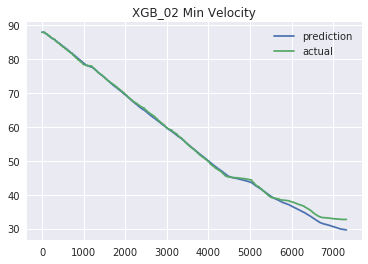

In [81]:
plt.plot(sma_list, label = "prediction")
plt.plot(list(sma_actual), label = "actual")
plt.title("XGB_02 Min Velocity")
plt.legend()
plt.show()

In [82]:
err = (((sma_list[-1] - list(sma_actual)[-1])))/(list(sma_actual)[0] - list(sma_actual)[-1])
print("Error for the Trip = {:.2f} %".format(err * 100))

Error for the Trip = -5.59 %


In [83]:
 !gsutil cp 'model_xgb_stack_2.pickle.dat' 'gs://msil_raw/training_data/model_xgb_stack_2.pickle.dat'

Copying file://model_xgb_stack_2.pickle.dat [Content-Type=application/octet-stream]...
- [1 files][ 21.1 MiB/ 21.1 MiB]                                                
Operation completed over 1 objects/21.1 MiB.                                     


In [4]:
 !gsutil cp 'scale_y.pickle.dat' 'gs://msil_raw/training_data/scale_y.pickle.dat'

Copying file://scale_y.pickle.dat [Content-Type=application/octet-stream]...
/ [1 files][  568.0 B/  568.0 B]                                                
Operation completed over 1 objects/568.0 B.                                      
